Профессия Data Science  
Блок 2. Подгрузка данных  
**SQL-3. Соединение таблиц**

---

## **✍ Оглавление:**

 1. Знакомимся с данными  
 2. Соединение таблиц по ключу
 3. Знакомимся с JOIN
 4. Фильтрация и агрегатные функции
 5. Способы соединения таблиц

---

## **1. Знакомимся с данными**

→ Первым делом — знакомимся с датасетом.

В этом модуле мы будем работать с таблицами о футбольных матчах и командах.
Нам понадобятся таблицы teams и matches.


**Таблица teams с данными о командах**

*Название столбца - Содержимое столбца*  
**id** - id команды  
**api_id** - ключ на таблицу matches  
**long_name** - полное название команды  
**short_name** - сокращённое название команды  

**Таблица matches с данными о матчах**

*Название столбца - Содержимое столбца*  
**id** - id матча  
**season** - сезон  
**date** - дата матча  
**home_team_api_id** - api_id домашней команды, ключ на таблицу teams  
**away_team_api_id** - api_id гостевой команды, ключ на таблицу teams  
**home_team_goals** - количество голов домашней команды  
**away_team_goals** - количество голов гостевой команды

**Задание 1.2 (External resource)**

***SELECT /*выбор*/  
  season,  
  sum(home_team_goals) as total_home_goals,  
  sum(away_team_goals) as total_away_goals  
FROM sql.matches  
GROUP BY 1  
ORDER BY 1 asc***

## **2. Соединение таблиц по ключу**

✍ Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе from. Что произойдёт в таком случае?

SELECT * /*выбор всех полей*/  
FROM  
    sql.teams, /*таблица с командами*/  
    sql.matches /*таблица с матчами*/

Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют **декартовым произведением таблиц**.


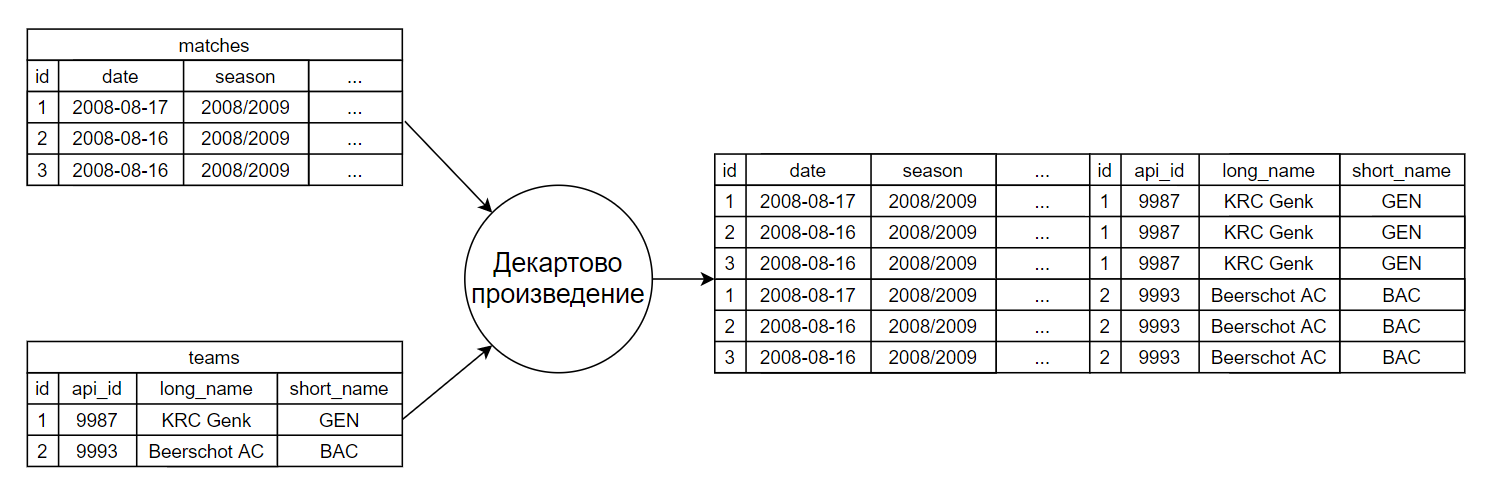

**Задание 2.1 (External resource)**

***SELECT COUNT(*)  
FROM  
    sql.teams,  
    sql.matches***

В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — **это ключи таблиц**, по которым они соединяются.

**Ключ** — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие where home_team_api_id = api_id.

***SELECT * /*выбор всех полей в таблице*/  
FROM  
    sql.teams, /*таблица с командами*/  
    sql.matches /*таблица с матчами*/  
WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен   api_id таблицы teams*/***

Итак, мы только что объединили таблицы **по ключу**.

**Ключи бывают двух основных типов:**

***Primary — первичный ключ*** — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.

***Foreign — внешний ключ*** — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.

***SELECT   
    long_name, /*столбец long_name таблицы teams*/  
    home_team_goals, /*столбец home_team_goals таблицы matches*/  
    away_team_goals /*столбец away_team_goals таблицы matches*/  
FROM  
    sql.teams, /*таблица с командами*/  
    sql.matches /*таблица с матчами*/  
WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен  api_id таблицы teams*/***

## **3. Знакомимся с JOIN**

**JOIN** — это оператор SQL, который позволяет соединять таблицы по условию.

#### **СИНТАКСИС**

Оператор JOIN упрощает процесс соединения таблиц.

Его синтаксис можно представить следующим образом:

**SELECT  
        столбец1,  
	столбец2,  
	...  
FROM  
	таблица1  
JOIN таблица2 ON условие**

Порядок присоединения таблиц в данном случае не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

**SELECT  
        столбец1,  
	столбец2,  
	...  
FROM  
	таблица1  
JOIN таблица2 ON условие  
JOIN таблица3 ON условие**  

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

→ К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.

Что же делать в таком случае?

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

***SELECT  
    teams.id /*столбец id таблицы teams*/  
FROM  
    sql.teams /*таблица teams*/  
JOIN sql.matches ON home_team_api_id = api_id /*оператор соединения таблиц; таблица  matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/***

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — **алиасы (от англ. alias)**.

Синтаксис для указания алиаса такой же, как и для названия столбца.

***SELECT  
        столбец1,  
	столбец2,  
	...  
FROM  
	таблица1 AS короткое_название_1  
JOIN таблица2 AS короткое_название_2 ON условие***

Название записывается без пробелов и операторов.

**Задание 3.1 (External resource)**

***SELECT *  
FROM  
    sql.teams      
join sql.matches on away_team_api_id = api_id***

**Задание 3.2 (External resource)**

***SELECT  
    m.id match_id,  
    t.id team_id  
FROM  
    sql.matches m  
    join sql.teams t on t.api_id = m.home_team_api_id  
ORDER BY 1***


**Задание 3.3 (External resource)**

***SELECT  
    m.id match_id,  
    s.short_name home_short,  
    sh.short_name away_short       
FROM   
    sql.matches m  
    JOIN sql.teams s ON m.home_team_api_id = s.api_id  
    JOIN sql.teams sh ON m.away_team_api_id = sh.api_id  
    ORDER BY 1***

## **4. Фильтрация и агрегатные функции**

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

**SELECT...   
FROM...   
WHERE...  
GROUP BY...   
ORDER BY... 
LIMIT...**

**ФИЛЬТРАЦИЯ ДАННЫХ**

К соединённым таблицам применимы функции фильтрации данных.

***SELECT  
    m.id /*столбец id таблицы m*/  
FROM  
    sql.teams t /*таблица teams с алиасом t*/  
    JOIN sql.matches m ON m.away_team_api_id = t.api_id /*оператор соединения  таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен  api_id таблицы t*/  
WHERE long_name = 'Arsenal' /*long_name таблицы teams имеет значение Arsenal*/***

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.    

**Задание 4.1 (External resource)**

***SELECT  
    t.long_name,  
    m.home_team_goals home_goal,  
    m.away_team_goals away_goal      
FROM  
    sql.teams t /*таблица teams с алиасом t*/  
    JOIN sql.matches m ON m.home_team_api_id = t.api_id /*оператор соединения таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/  
WHERE short_name = 'GEN' /*long_name таблицы teams имеет значение Arsenal*/***

Также мы можем отфильтровать записи сразу по двум таблицам.

***SELECT * /*выбор всех полей*/  
FROM      
    sql.matches m /*таблица matches с алиасом m*/  
    JOIN sql.teams t on t.api_id = m.home_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t*/  
WHERE  
    t.short_name = 'GEN' /*столбец short_name таблицы t имеет значение GEN*/  
    AND m.season = '2008/2009' /*столбец season таблицы m имеет значение 2008/2009*/***

**Задание 4.2 (External resource)**

***SELECT  
    m.id,  
    h.short_name home_short,  
    a.short_name away_short  
FROM    
    sql.matches m /*таблица matches с алиасом m*/  
    JOIN sql.teams h on h.api_id = m.home_team_api_id  
    JOIN sql.teams a on a.api_id = m.away_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t*/  
WHERE  
    m.season = '2011/2012' /*столбец season таблицы m имеет значение 2008/2009*/  
    AND  
    (h.long_name = 'Liverpool' or a.long_name = 'Liverpool')***

**АГРЕГАЦИЯ ДАННЫХ**

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

***SELECT  
    t.long_name, /*столбец long_name таблицы t*/   
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/  
FROM  
    sql.matches m /*таблица matches с алиасом m*/  
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/  
GROUP BY t.id /*группировка по столбцу id таблицы t*/***

Можно использовать оператор HAVING для фильтрации сгруппированных данных.

***SELECT  
    m.season, /*столбец season таблицы m*/  
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/  
FROM sql.matches m /*таблица matches с алиасом m*/  
GROUP BY m.season /*группировка по столбцу season таблицы m*/***

***SELECT  
    m.season, /*столбец season таблицы m*/  
    t.long_name, /*столбец long_name таблицы t*/ 
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/ 
FROM sql.matches m /*таблица matches с алиасом m*/  
JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/  
GROUP BY m.season, t.id /*группировка по столбцам season таблицы m и id таблицы t*/   
HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100 /*оператор фильтрации сгруппированных данных; функция суммирования; home_team_goals таблицы m; функция суммирования; away_team_goals таблицы m; больше 100*/***

**Задание 4.3 (External resource)**
***SELECT  
    t.long_name  
FROM  
    sql.matches m  
JOIN sql.teams t ON m.away_team_api_id = t.api_id  
GROUP BY t.id  
HAVING COUNT(*) >= 150  
ORDER BY 1***

## **5. Способы соединения таблиц**

**INNER JOIN**

INNER JOIN — это тот же JOIN (слово inner в операторе можно опустить).

Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

***SELECT   
COUNT(DISTINCT t.id) /*оператор подсчёта строк; оператор исключения повторяющихся строк; столбец id*/  
FROM   
sql.teams t /*таблица teams с алиасом t*/  
JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения inner JOIN; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/***

**LEFT OUTER JOIN И RIGHT OUTER JOIN**

Также существуют схожие друг с другом типы соединения — LEFT JOIN и RIGHT JOIN (слово outer в операторе можно опустить).

Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

? Почему соответствий может не быть?

Причины могут быть разные, назовём две основные:

1 Различная бизнес-логика таблиц.

2 Разное время обновления таблиц.

***SELECT  
    t.long_name, /*столбец long_name таблицы t*/  
    m.id /*столбец id таблицы m*/  
FROM sql.teams t /*таблица teams с алиасом t*/  
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/  
ORDER BY m.id DESC /*сортировка по id таблицы m по убыванию, чтобы увидеть строки со значением null*/***


***SELECT  
    t.long_name /*столбец long_name таблицы t*/  
FROM   
    sql.teams t /*таблица teams с алиасом t*/  
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/  
WHERE m.id IS NULL /*условие: столбец id таблицы m имеет значение null*/***

**Обратите внимание!** Если мы добавим какой-либо фильтр по отличному от NULL значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы станет необходимым присутствие такого (NOT NULL) значения в строке.

**Задание 5.1 (External resource)**

***SELECT  
  DISTINCT t.long_name  
FROM sql.teams t  
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id or t.api_id = m.away_team_api_id  
WHERE m.id is not null  
ORDER BY 1***

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

***SELECT  
    t.long_name,  
    SUM(m.away_team_goals) total_goals  
FROM  
    sql.teams t /*таблица teams с алиасом t*/  
LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id /*оператор соединения LEFT JOIN; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/  
GROUP BY t.id /*группировка по столбцу id таблицы t*/  
ORDER BY 2 DESC /*сортировка по столбцу total_goals по убыванию, чтобы увидеть строки со значением null*/***

**Обратите внимание!** При применении функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

**Задание 5.2 (External resource)**

***SELECT  
t.long_name,  
COUNT(m.id) matches_cnt  
FROM sql.teams t  
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id or t.api_id = m.away_team_api_id  
GROUP BY t.id  
ORDER BY 2, 1***

При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.

Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

**FULL OUTER JOIN**

Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

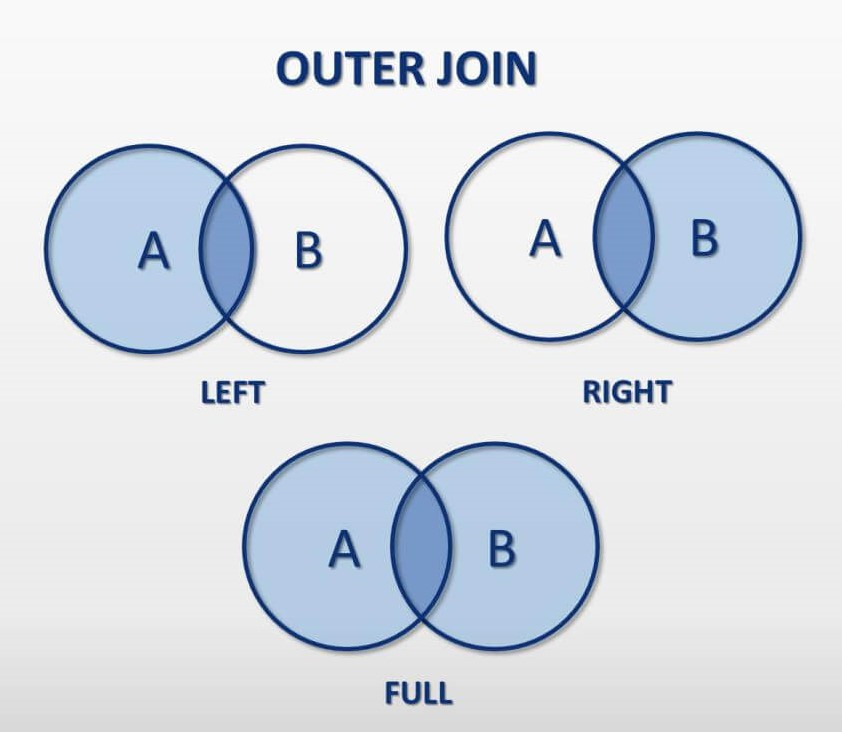

Синтаксис FULL OUTER JOIN аналогичен другим JOIN.

SELECT 
…
FROM
	table1
FULL OUTER JOIN table2 ON условие

**CROSS JOIN**

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

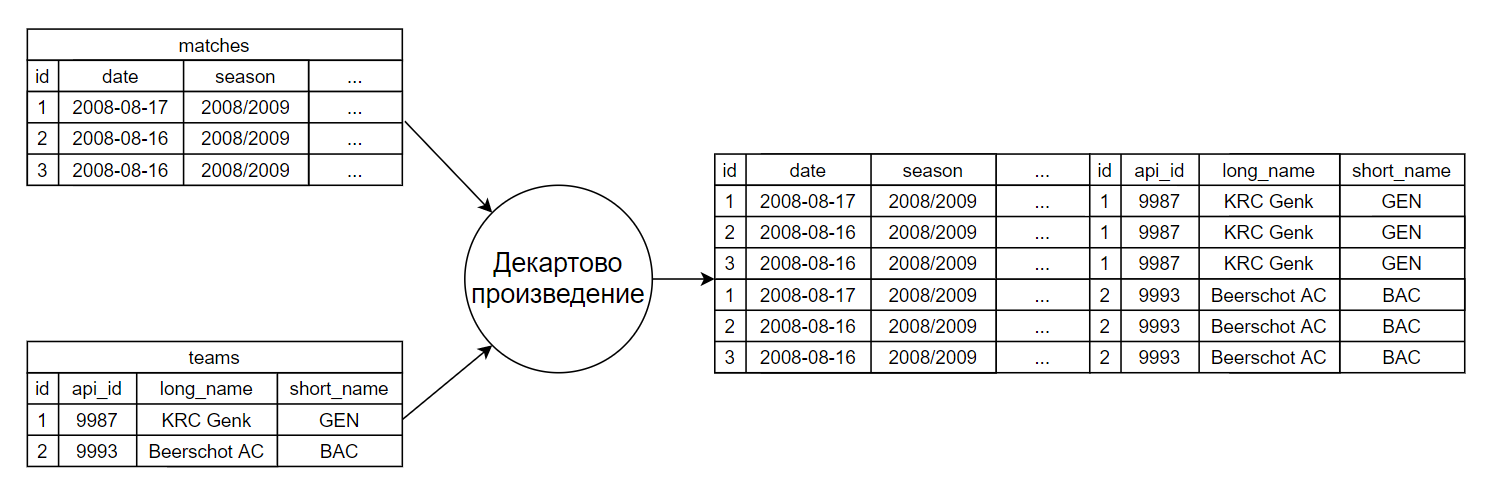

**SELECT * /*выбор всех полей*/  
FROM  
    sql.teams /*таблица teams*/  
    CROSS JOIN sql.matches /*таблица matches*/**

Обратите внимание! Условие для CROSS JOIN, в отличие от других операторов, не требуется.

Также этот запрос можно записать с помощью INNER JOIN с условием on true — результат будет тот же.

**SELECT * /*выбор всех полей*/  
FROM  
    sql.teams /*таблица teams*/  
    JOIN sql.matches ON TRUE /*оператор соединения INNER JOIN; таблица matches; условие: для всех случаев*/**

CROSS JOIN может быть полезен, когда необходимо создать таблицу фактов.

**Задание 5.3 (External resource)**

***SELECT DISTINCT  
t1.short_name home_team,  
t2.short_name away_team  
FROM  
sql.teams t1 CROSS JOIN sql.teams t2  
WHERE t1.id != t2.id  
ORDER BY 1,2***

**NATURAL JOIN**

Ключевое слово natural в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

NATURAL JOIN можно использовать с любыми видами соединений, которые требуют условия соединения:

→ NATURAL INNER JOIN (возможна запись NATURAL JOIN);
→ NATURAL LEFT JOIN;
→ NATURAL RIGHT JOIN;
→ NATURAL FULL OUTER JOIN.

При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Для наших таблиц teams и matches этот вид соединения не подойдёт, так как общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.

Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.

То есть для таблиц table1 и table2

table1: id, name, ...

table2: id, name, ...

запрос

**SELECT  
…  
FROM          table1 NATURAL JOIN table2  
будет равнозначен запросу**

**SELECT  
…  
FROM          table1 t1  
INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name**

**ОБЩАЯ ЛОГИКА ПОСТРОЕНИЯ ЗАПРОСА С JOIN**

При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.